# Support Vector Machines With Python

In this project, I explore Machine Learning on the breast cancer data set from scikit learn. The initial Support Vector Machine performs very poorly, and through the use of a grid search, I optimize the SVC model to ~95% accuracy after finding the best paramaters of C and gamma. The final SVC model helps to predict with high accuracy of our target class (binary classification) of whether there is presence of a benign or malignant tumor.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
cancer = load_breast_cancer()

In [15]:
cancer.keys()

dict_keys(['target', 'target_names', 'DESCR', 'data', 'feature_names'])

In [16]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [17]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [18]:
df_feat.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [19]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [20]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

# 

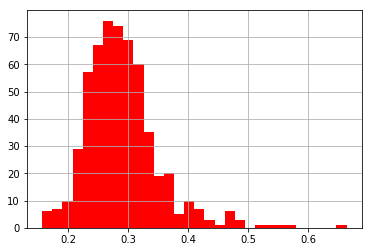

In [24]:
df_feat['worst symmetry'].hist(bins=30,color='red')

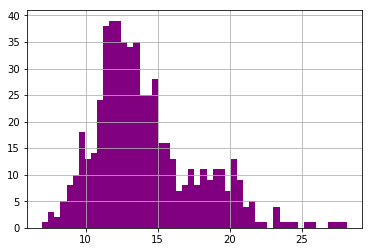

In [27]:
df_feat['mean radius'].hist(bins=50,color='purple')

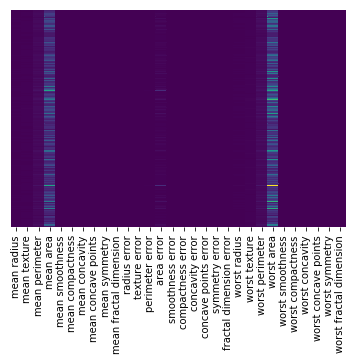

In [29]:
sns.heatmap(df_feat,yticklabels=False,cbar=False,cmap='viridis')

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [39]:
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()

In [42]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
predictions = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0  66]
 [  0 105]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/Users/ChristopherTruong/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After training our model, it predicted that no tumors were in the zero class. It predicted everything belonging to class 1. Our model needs its parameter adjusted and normalized. To find the right parameters we need to use a grid search. This will help us find the right parameters for C or Gamma values. 

In [49]:
from sklearn.grid_search import GridSearchCV

grid search cv takes in a dictionary that describes the parameters that should be tried and a model to train. the grid of parameters is defined as a dictionary where the keys are parameters and the values are list of settings to be tested.

C controls the cost of misclassification on the training data. A large C value low bias and high variance. Low bias because you penalize the cost of misclassification a lot with a larger c value. With a smaller C value you're not going to penalize as much so there's a higher balance and lower variance



In [52]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [53]:
grid = GridSearchCV(SVC(),param_grid,verbose=3) #verbose is text description of model

In [54]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.631579 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.631579 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.636364 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.631579 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.631579 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.636364 -   0.0s
[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...................... gamma=0.01, C=0.1, score=0.636364 -   0.0s
[CV] gamma=0.001, C=0.1 ..............................................
[CV] ..................... gamma=0.001, C=0.1, score=0.631579 -   0.0s
[CV] gamma=0.001, C=0.1 ..............................................
[CV] ..................... gamma=0.001, C=0.1, score=0.631579 -   0.0s
[CV] gamma=0.001, C=0.1 ..............................................
[CV] ..................... gamma=0.001, C=0.1, score=0.636364 -   0.0s
[CV] gamma=0.0001, C=0.1 .............................................
[CV] .................... gamma=0.0001, C=0.1, score=0.902256 -   0.0s
[CV] gamma=0.0001, C=0.1 .............................................
[CV] .................... gamma=0.0001, C=0.1, score=0.962406 -   0.0s
[CV] gamma=0.0001, C=0.1 .............................................
[CV] .................... gamma=0.0001, C=0.1, score=0.916667 -   0.0s
[CV] 

[CV] ................... gamma=0.0001, C=1000, score=0.909774 -   0.0s
[CV] gamma=0.0001, C=1000 ............................................
[CV] ................... gamma=0.0001, C=1000, score=0.969925 -   0.0s
[CV] gamma=0.0001, C=1000 ............................................
[CV] ................... gamma=0.0001, C=1000, score=0.931818 -   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

runs the same loop with model selection to find best parameter combination, then with the best combination it runs fit again on all data passed to that fit without model selection to build a single new model with the best parameter setting.

In [55]:
grid.best_params_    #best model selection score

{'C': 10, 'gamma': 0.0001}

In [56]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
grid_predictions = grid.predict(X_test)

In [59]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]
             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



Our model is performing very well in the ~95 percentiles where as before it was predicting everything as class 1. This contrast displays the power of using a grid search with a support vector machine. Finding a good C and Gamma value using a grid search for large data sets can take a long time though.